# Spatial transcriptomics

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import scanpy as sc

from read_roi import read_roi_zip
from shapely import geometry
from pylab import rcParams

random_seed = 12345

def get_centroids_coord(rois):

    points = []
    for _, values in rois.items():
        poly = geometry.Polygon(list(zip(values['x'], values['y'])))
        points.append([poly.centroid.x, poly.centroid.y])
    
    return np.array(points)
        

def load_object(path: str) -> sc.AnnData:
    if not os.path.exists(path):
        print(f"Provided {path} does not exists!")
        
    counts = glob.glob(f"{path}/*.csv")
    if len(counts) != 1:
        print("Can't find a csv count matrix")
    
    counts = counts[0]
    
    adata = sc.AnnData(X = pd.read_table(counts, skiprows=1, index_col=0).T)
    adata = adata[adata.obs_names[:-1], :]
    rois = read_roi_zip(f"{path}/RoiSet.zip")
    adata.obsm['spatial'] = get_centroids_coord(rois)
    
    return adata

In [2]:
our_genes = [
    "Tmsb10",
    "Trh",
    "Cpm",
    "Ifitm1",
    "Nid2",
    "Afp",
    "Selenop",
    "Ctsh",
    "Trap1a",
    "Fmr1nb",
    "Myl6b",
    "Gsn",
    "Krt19",
    "Peg10",
    "Wfdc2",
    "Atp1b1",
    "Tmem37",
    "Tmem120a",
    "Ino80c",
    "Sat1",
    "Lgmn",
    "Slc39a8",
    "Apoe",
    "S100a10",
    "Tagln2",
] + ['T', 'Foxa2']

In [3]:
import matplotlib
custom_col = matplotlib.colors.ListedColormap(['yellow', 'blue'])
custom_col.set_over('1')

In [5]:
d1_3 = load_object("../zenodo/spatial/processed/D1_3/")
sc.pp.normalize_total(d1_3, target_sum=1_000)
sc.pp.log1p(d1_3)

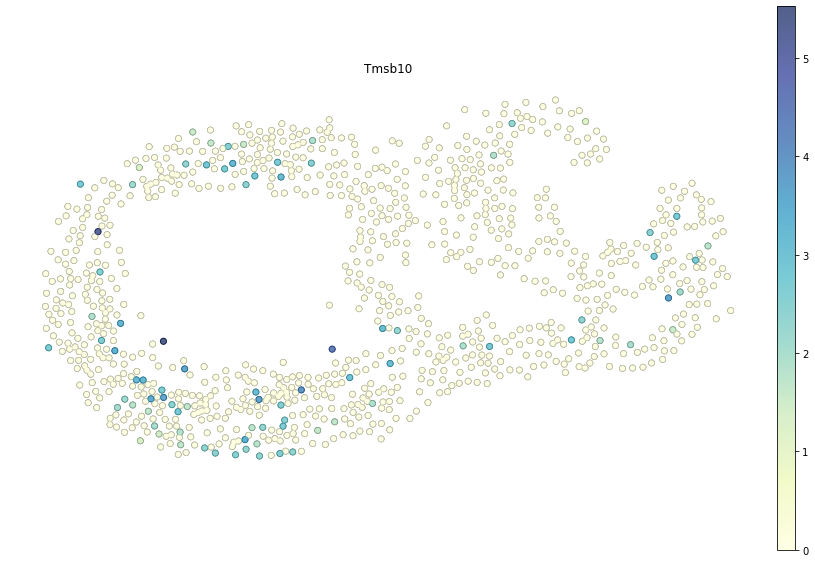

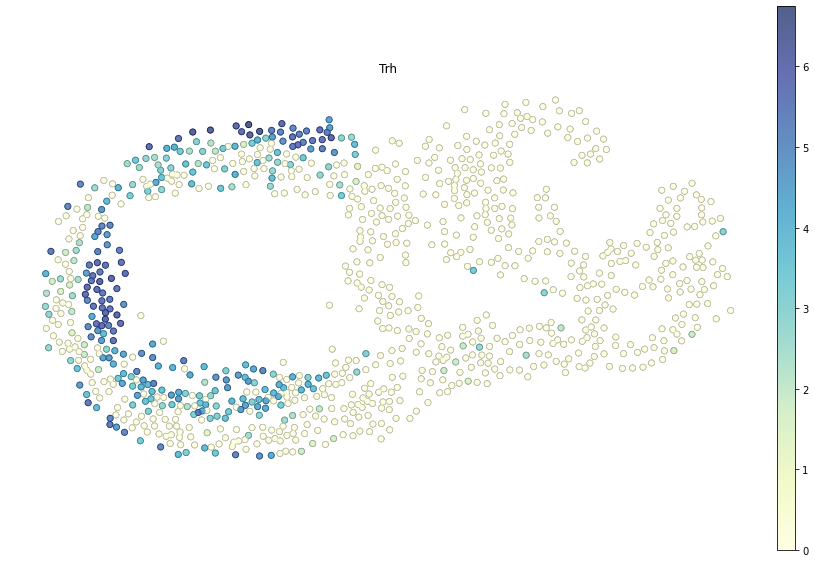

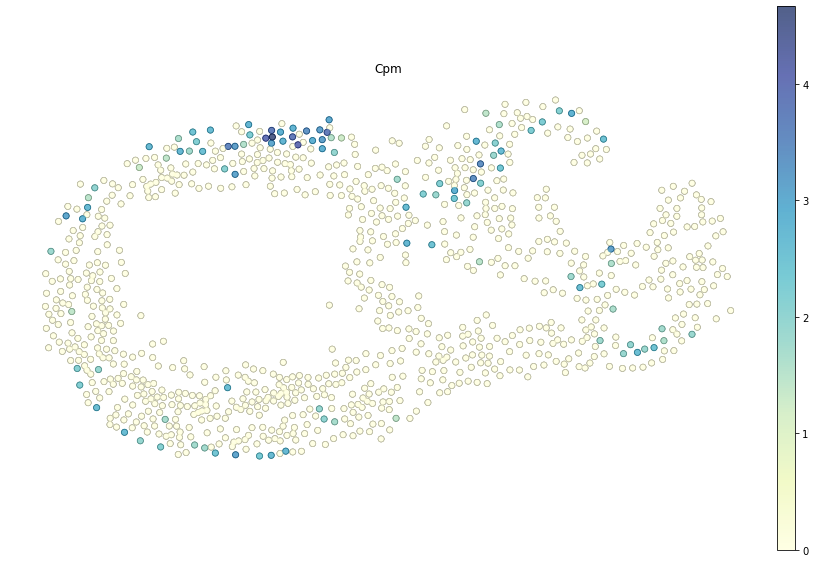

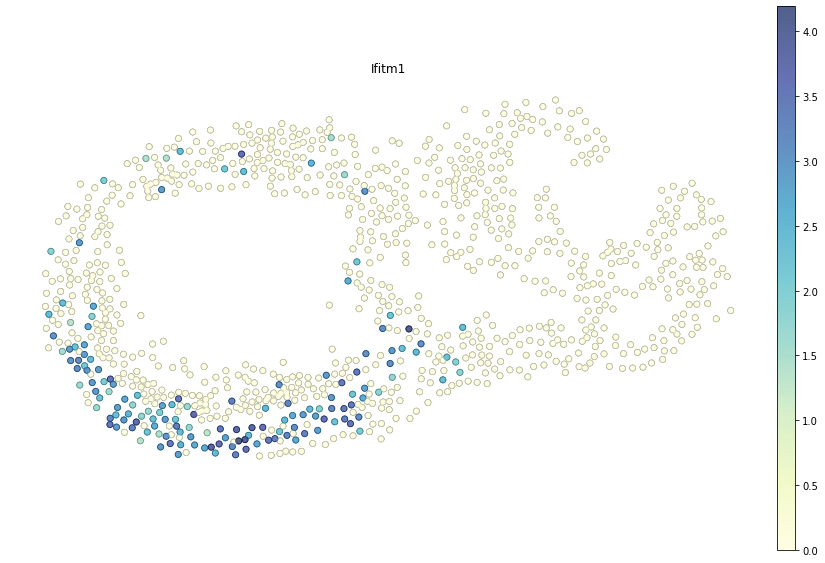

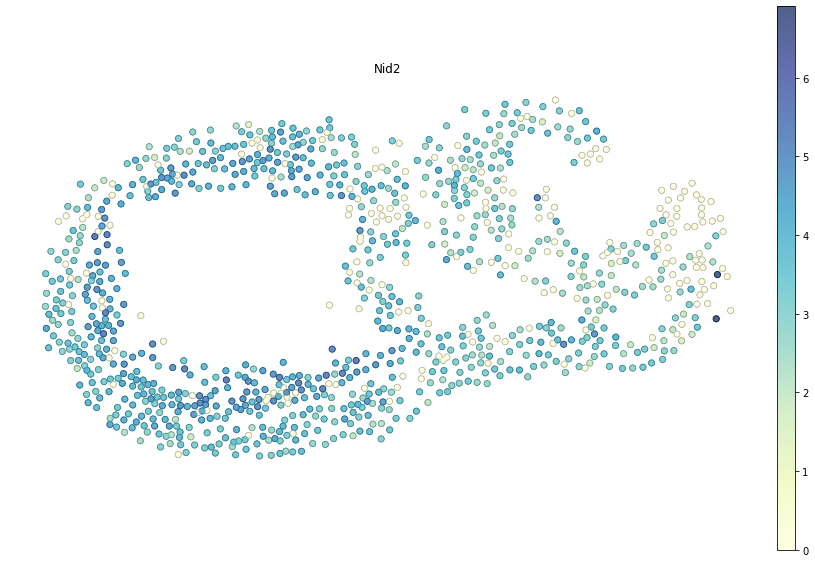

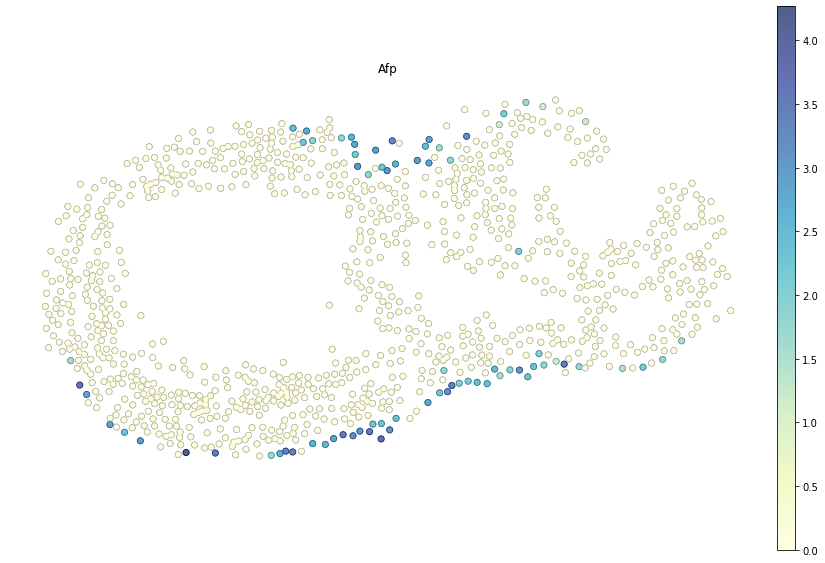

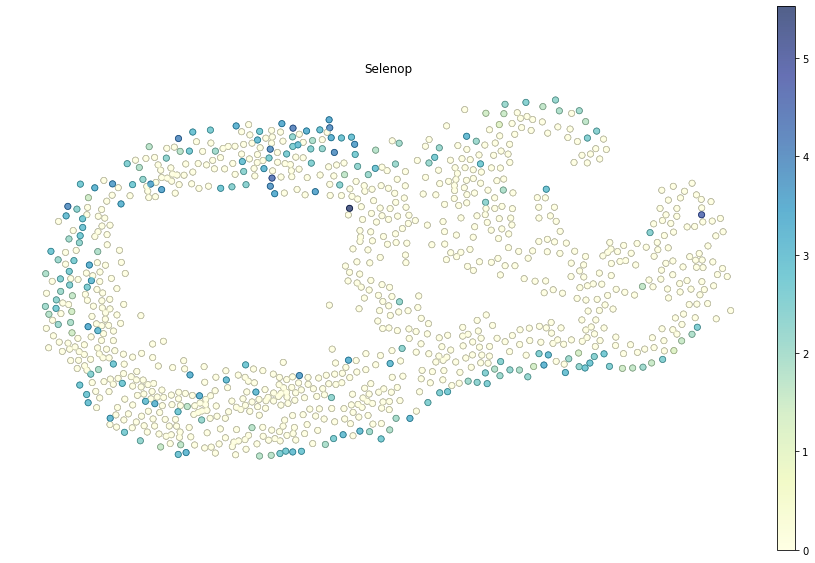

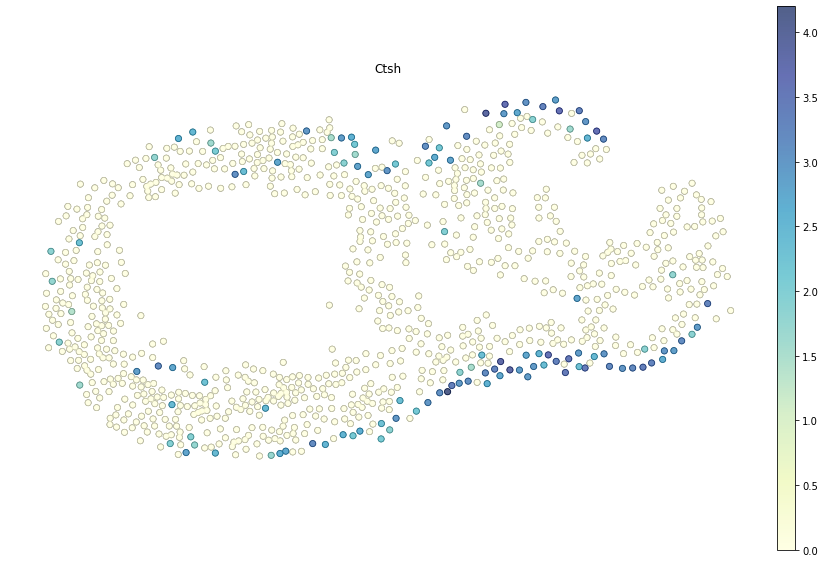

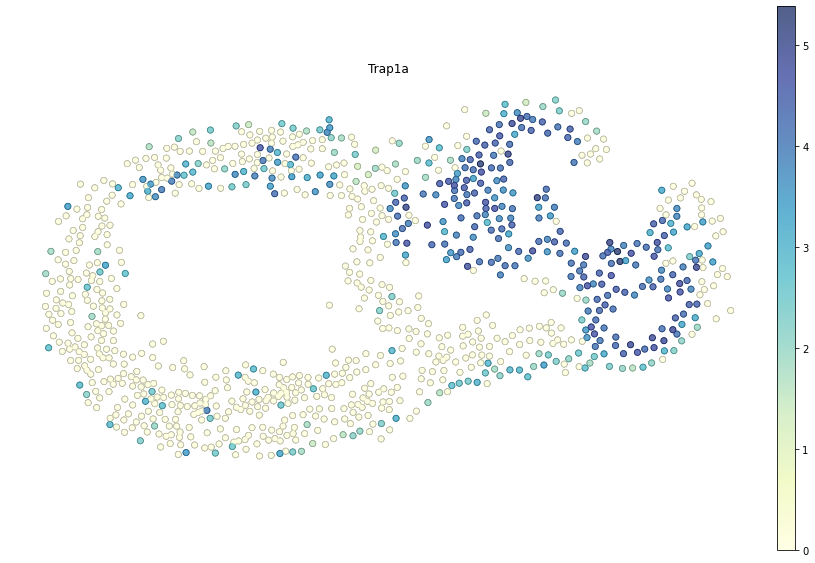

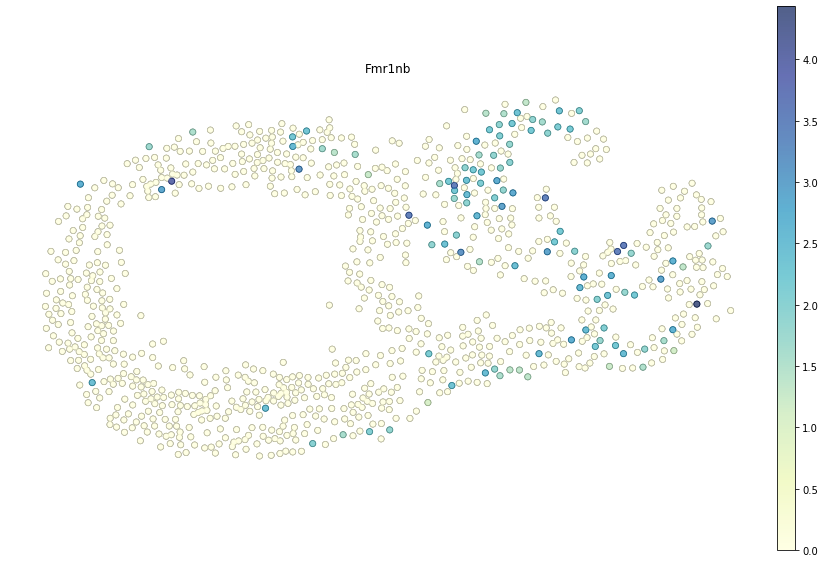

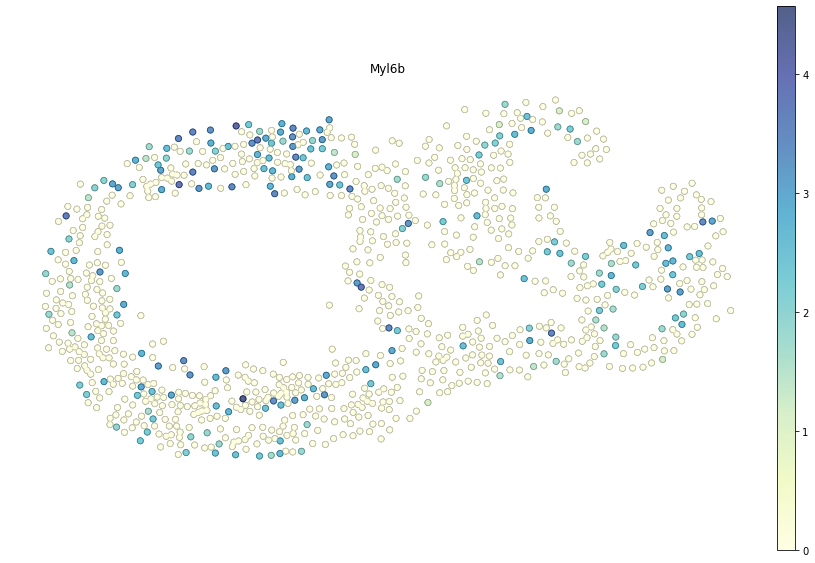

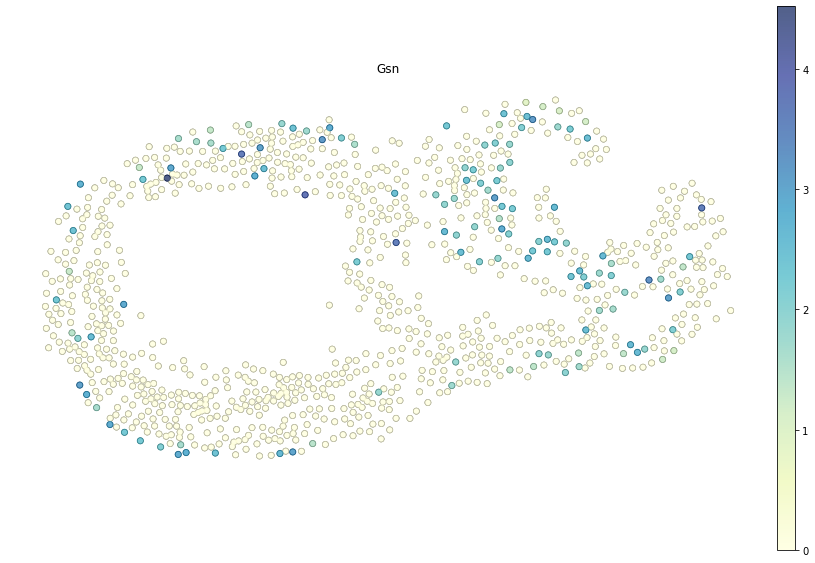

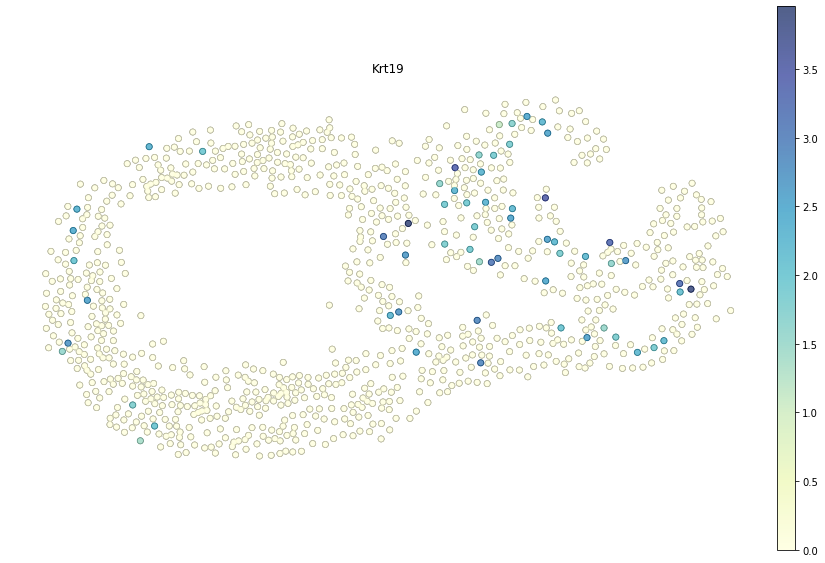

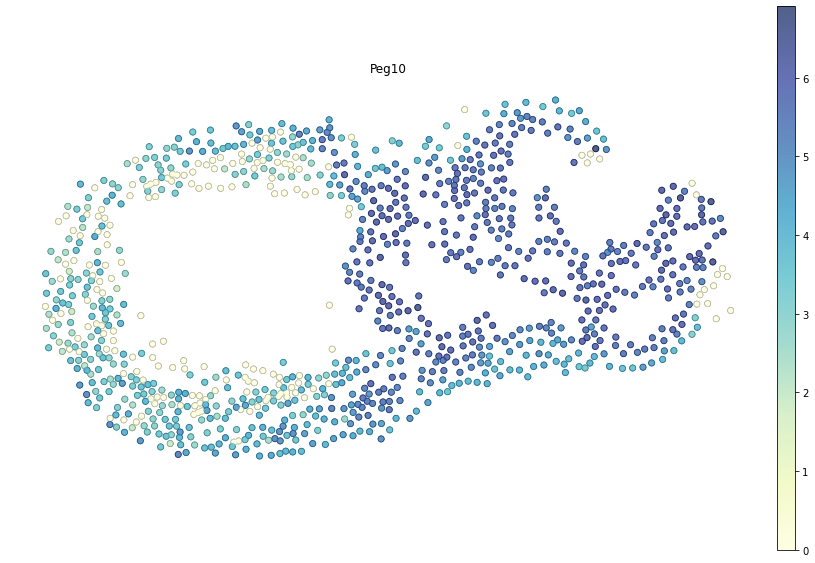

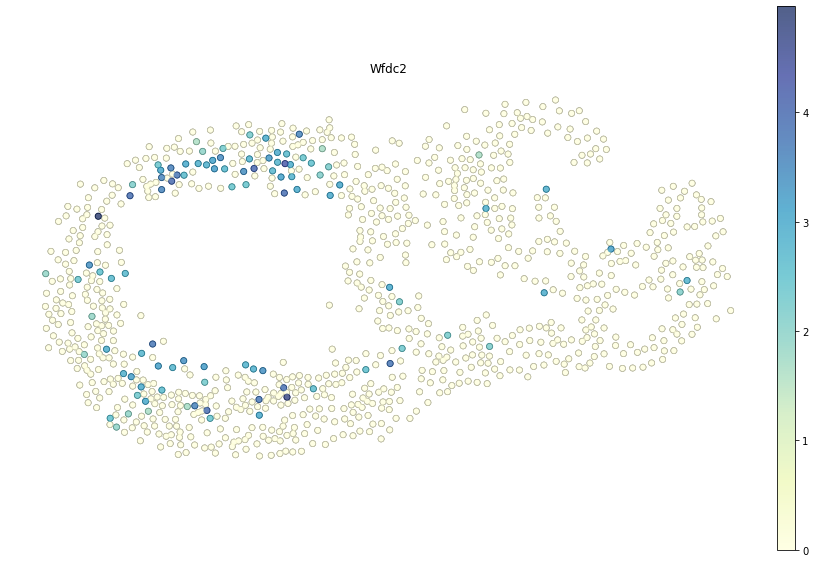

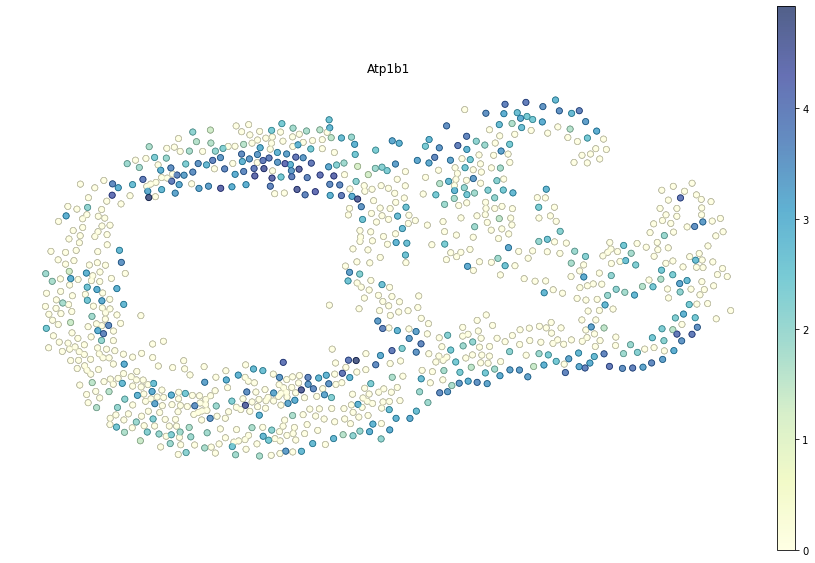

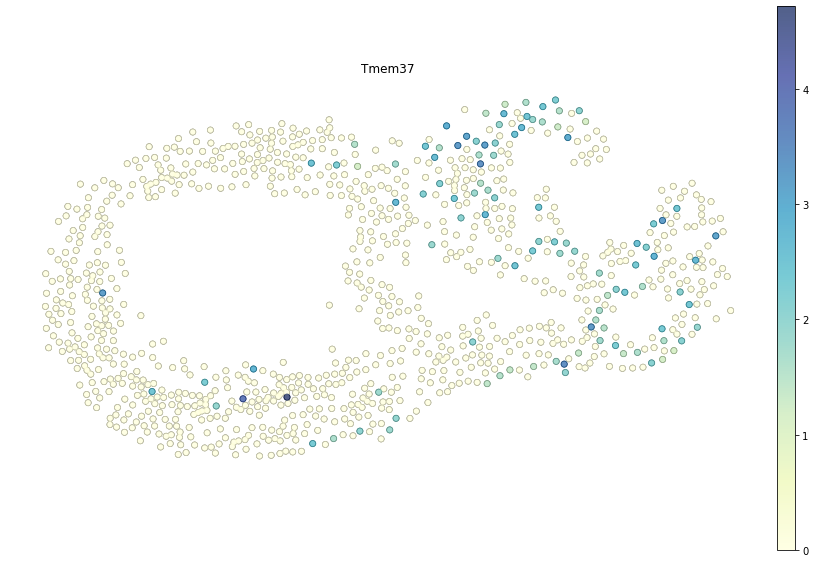

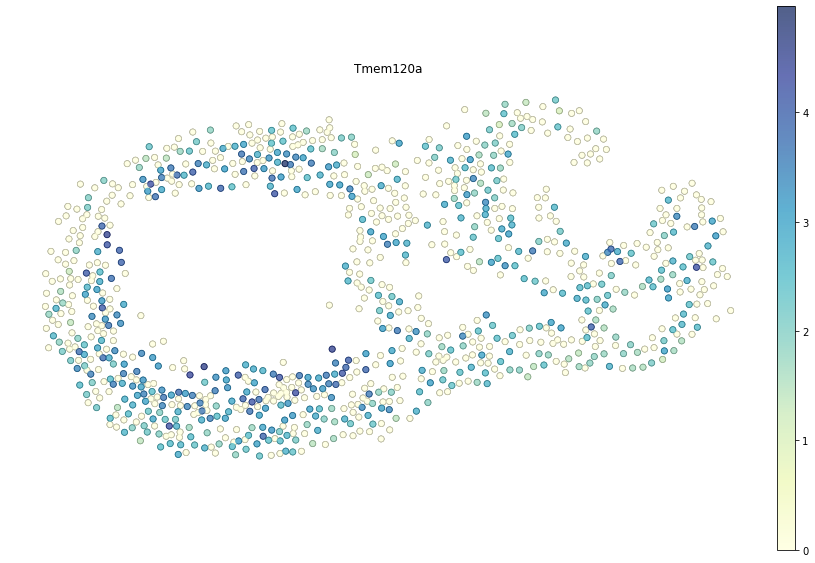

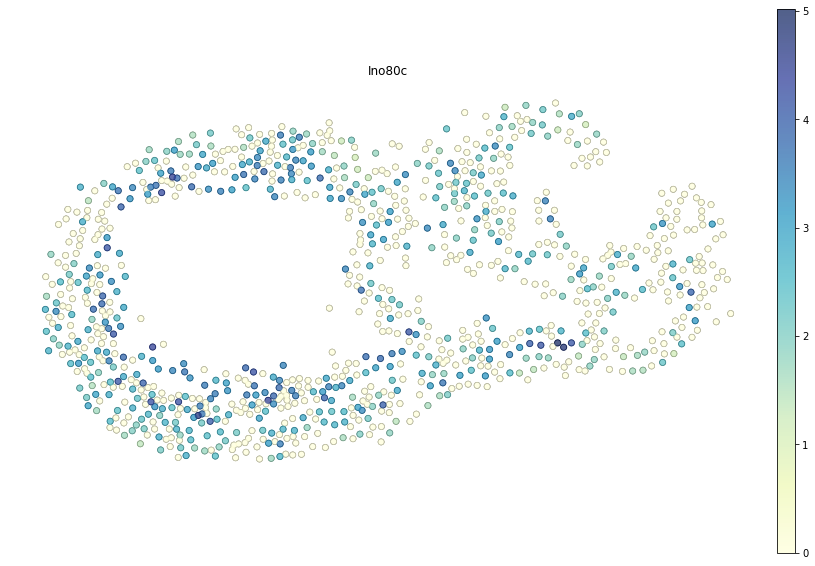

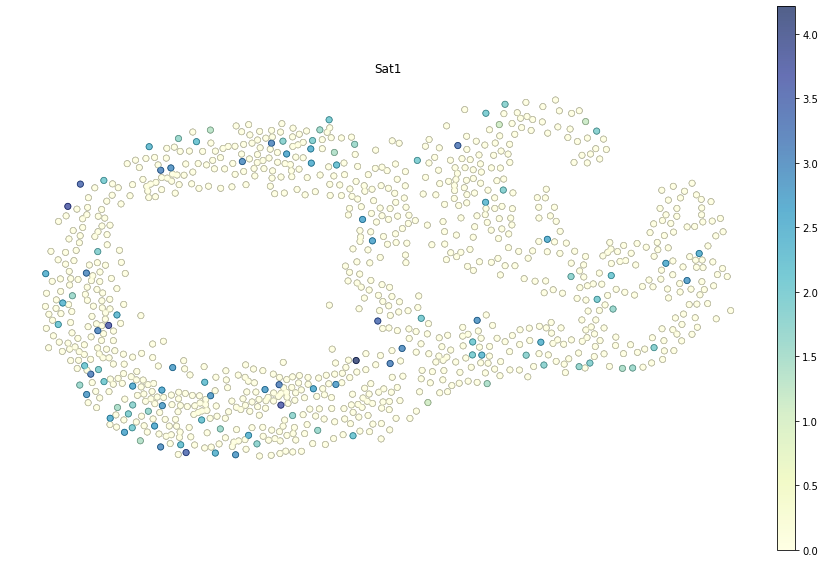

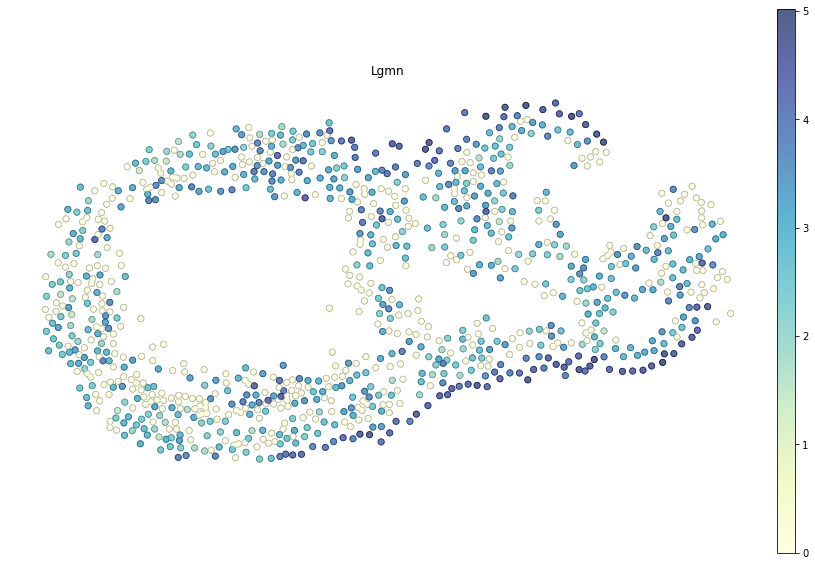

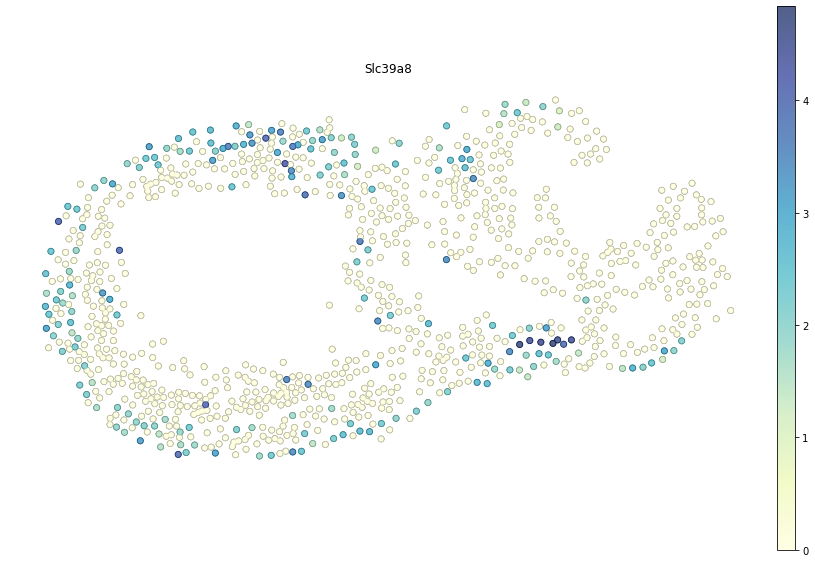

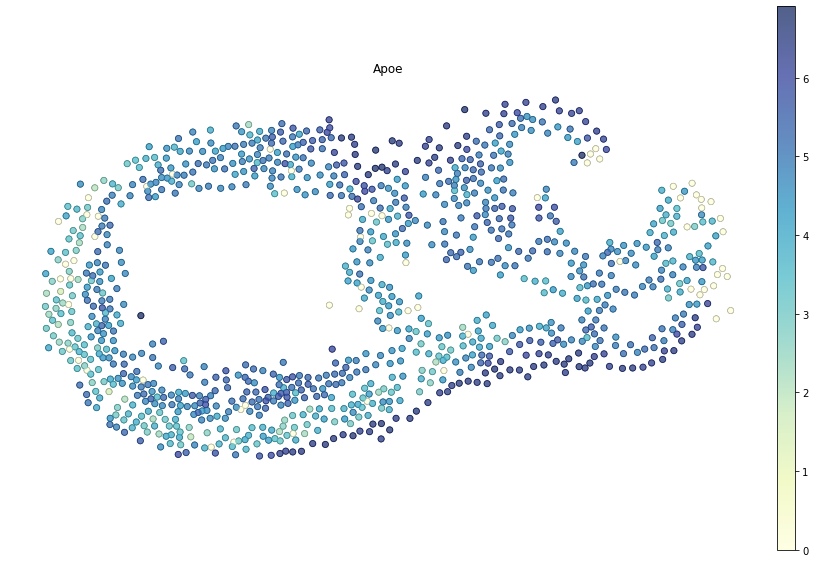

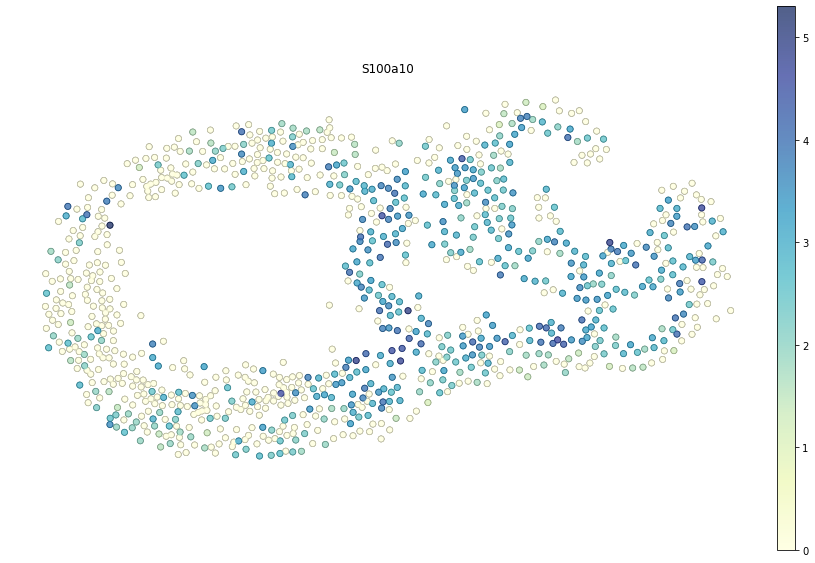

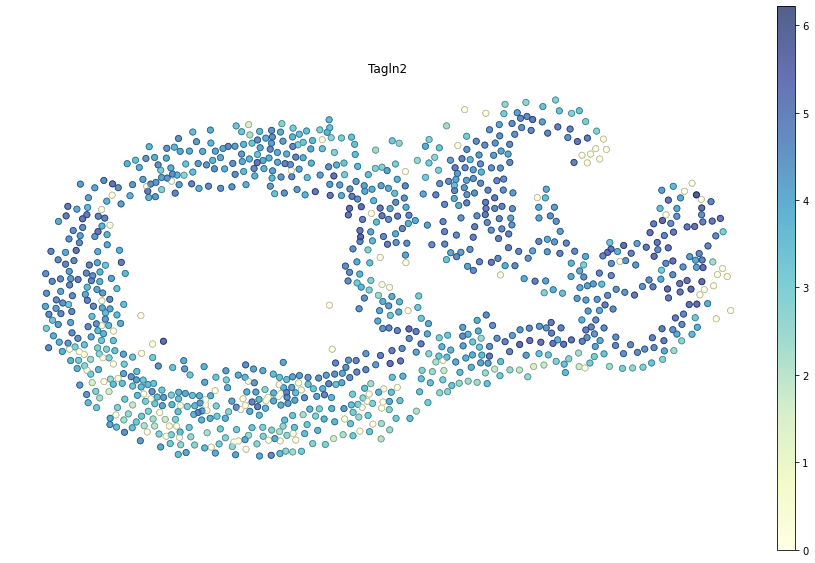

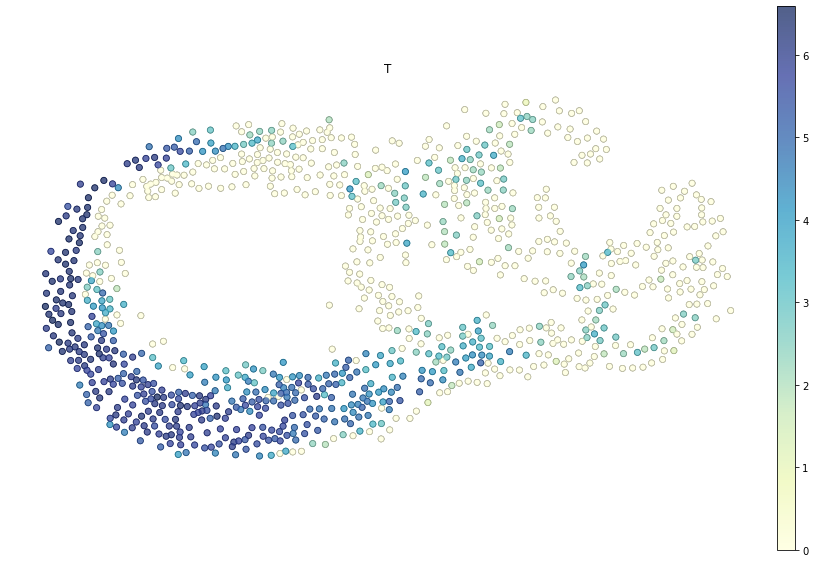

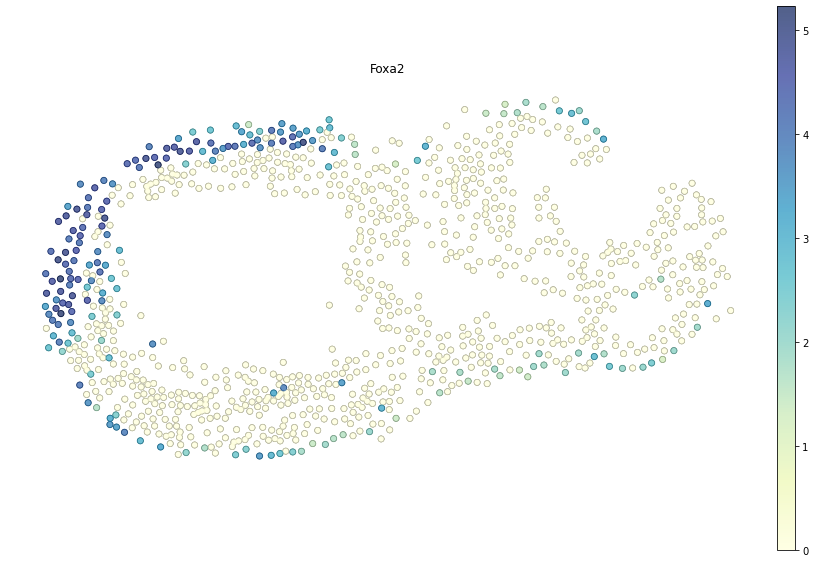

In [6]:
rcParams['figure.figsize'] = 15, 10
for gene in our_genes:
    sc.pl.spatial(d1_3, color=gene, spot_size=40, frameon=False, color_map="YlGnBu", title=gene, add_outline=True, outline_width=[0.3, 0.7])

In [7]:
!jupyter nbconvert --to html 07_spatial.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 07_spatial.ipynb to html
[NbConvertApp] Writing 8410586 bytes to ../reports/07_spatial.html
